# [FinalExam]-[MATH6149016 ; MATH6149049 ]-[MachineLearning]

**Thursday, July 14, 2022.**

**Student Name**  :Devin Augustin   
**Student ID**    :2440094352     

* [Dataset Link](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data)
## <strong>Dataset Description</strong>
<br>
 <strong>a record of the crimes that have occurred in Chicago</strong>
 <br>
<ul><li><strong>Domestic :</strong> Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.</li>
    <li><strong>Beat :</strong> Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts.</li>
    <li><strong>District :</strong> Indicates the police district where the incident occurred</li>
    <li><strong>Ward :</strong> The ward(City Council District) where the incident occurred</li>
    <li><strong>Community Are :</strong> Indicates the community area where the incident occurred. Chicago has 77 community areas.</li>
    <li><strong>FBI Code :</strong> Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).</li>
    <li><strong>Date :</strong> A given month (1 : January, 12 : December); a given hour (1 to 23)</li>
</ul>

**NOTES:**
<li>You are required to build <strong>'the BEST and suitable'</strong> supervised machine learning model for the given dataset. The model may be used for the effective deployment of police officers in a city across several districts regarding the degree to which each area is prone to crime at a particular hour, day, and month. </li>
<li>Build multiple potentially suitable machine learning models (at least 2 different machine learning models).</li>
<li>You have to evaluate the models using at least 2 performance metrics before choose what you assume to be the `"best"` model for the given dataset.</li>

**HINT:** 
1. You need to generate the target feature by **performing feature engineering on `Date` and `Primary Type` features** to group crimes together
<br>
2. Level of Crime Rate:
<ul><li><strong>0-14 : </strong>Low Crime Rate</li>
<li><strong>15-33 : </strong>Medium Crime Rate</li>
<li><strong>34 and above : </strong>High Crime Rate</li>
<br>
3. You may need to check the data proportion in each class (imbalance/not)

## 1. Load the neccessary Libraries and Data (2 pts.)

Import the necessary libraries and the dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/DEVIN/Desktop/UAS Sem 4/UAS_MATH6149049_MachineLearning/evenID.csv')

## 2. Data Exploration (15 pts.)

Let's look at the data.

In [3]:
df

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,861410,11476552,JB475560,10/14/2018 06:51:00 PM,039XX W OGDEN AVE,0820,THEFT,$500 AND UNDER,SMALL RETAIL STORE,True,...,22.0,29.0,06,1150286.0,1889027.0,2018,10/21/2018 04:09:44 PM,41.851393,-87.723904,"(41.851393305, -87.723903515)"
1,783641,10828749,JA130110,01/25/2017 11:00:00 PM,011XX S OAKLEY BLVD,031A,ROBBERY,ARMED: HANDGUN,STREET,False,...,25.0,28.0,03,1161221.0,1894904.0,2017,02/14/2017 03:49:42 PM,41.867300,-87.683606,"(41.867300404, -87.683606131)"
2,650716,11031423,JA363907,07/26/2017 12:30:00 AM,018XX N CLARK ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,...,43.0,7.0,07,1174558.0,1912475.0,2017,02/10/2018 03:50:01 PM,41.915229,-87.634119,"(41.915228778, -87.634118723)"
3,496462,10430338,HZ168230,02/26/2016 03:00:00 AM,002XX W JACKSON BLVD,0860,THEFT,RETAIL THEFT,CONVENIENCE STORE,False,...,2.0,32.0,06,1174641.0,1898950.0,2016,02/10/2018 03:50:01 PM,41.878114,-87.634219,"(41.878113603, -87.634218691)"
4,946330,11361027,JB324433,06/26/2018 12:30:00 PM,0000X E MONROE ST,0890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,...,42.0,32.0,06,1176686.0,1899939.0,2018,07/03/2018 03:55:36 PM,41.880782,-87.626680,"(41.880781519, -87.626680112)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031739,438936,10525983,HZ267425,05/16/2016 08:50:00 PM,015XX E 53RD ST,0890,THEFT,FROM BUILDING,OTHER,False,...,4.0,41.0,06,1187505.0,1870429.0,2016,02/10/2018 03:50:01 PM,41.799553,-87.587895,"(41.799553224, -87.587894753)"
1031740,324649,10708413,HZ465384,10/07/2016 06:00:00 PM,066XX W FULLERTON AVE,0870,THEFT,POCKET-PICKING,SMALL RETAIL STORE,False,...,36.0,19.0,06,NaN,NaN,2016,10/14/2016 04:07:57 PM,NaN,NaN,NaN
1031741,382880,10612722,HZ365526,07/26/2016 03:45:00 PM,0000X W MADISON ST,0820,THEFT,$500 AND UNDER,SIDEWALK,False,...,42.0,32.0,06,1176107.0,1900380.0,2016,02/10/2018 03:50:01 PM,41.882005,-87.628793,"(41.882004711, -87.628792836)"
1031742,48856,10286160,HY473701,10/22/2015 08:00:00 AM,082XX S VERNON AVE,0820,THEFT,$500 AND UNDER,RESIDENCE PORCH/HALLWAY,False,...,6.0,44.0,06,1180680.0,1850414.0,2015,02/10/2018 03:50:01 PM,41.744790,-87.613538,"(41.744789745, -87.613537842)"


Let's take look at the data type.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031744 entries, 0 to 1031743
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1031744 non-null  int64  
 1   ID                    1031744 non-null  int64  
 2   Case Number           1031744 non-null  object 
 3   Date                  1031744 non-null  object 
 4   Block                 1031744 non-null  object 
 5   IUCR                  1031744 non-null  object 
 6   Primary Type          1031744 non-null  object 
 7   Description           1031744 non-null  object 
 8   Location Description  1028467 non-null  object 
 9   Arrest                1031744 non-null  bool   
 10  Domestic              1031744 non-null  bool   
 11  Beat                  1031744 non-null  int64  
 12  District              1031743 non-null  float64
 13  Ward                  1031735 non-null  float64
 14  Community Area        1031742 non-

Let's see all the different type of crimes

In [5]:
df_crime=df['Primary Type'].nunique()
df_crime

33

Text(0.5, 0, 'Number of Crimes')

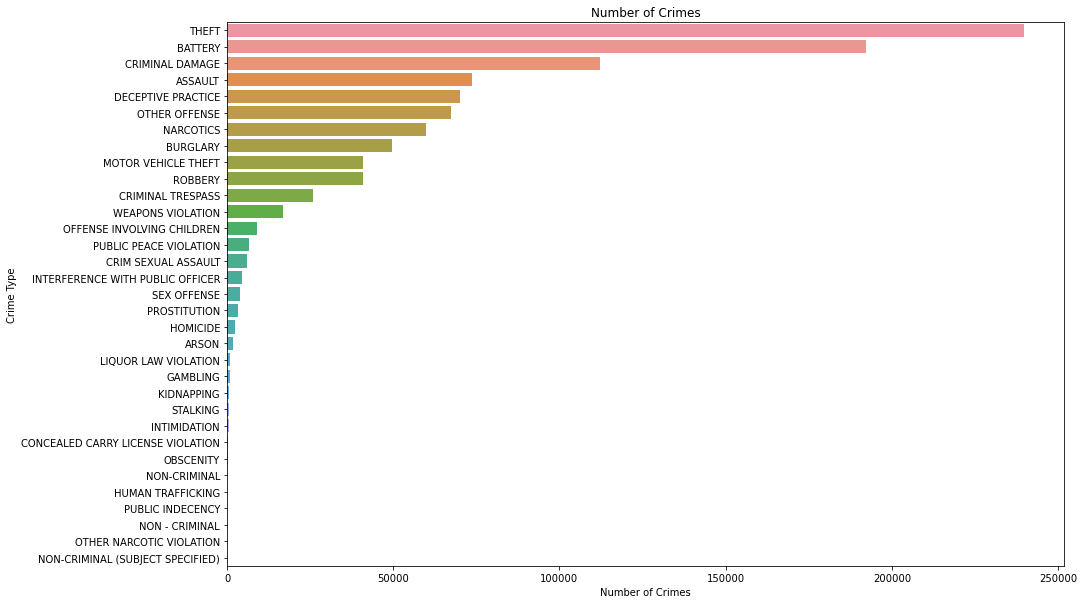

In [6]:
order_data = df['Primary Type'].value_counts().index
plt.figure(figsize=(15,10))
sns.countplot(y='Primary Type', data=df, order = order_data)
plt.title('Number of Crimes')
plt.ylabel('Crime Type')
plt.xlabel('Number of Crimes')

In [7]:
df_location=df['Location Description'].nunique()
df_location

153

Since we have over 150 different location in the dataset, we are only going to check the top 15 locations.

Text(0.5, 0, 'Number of Crimes')

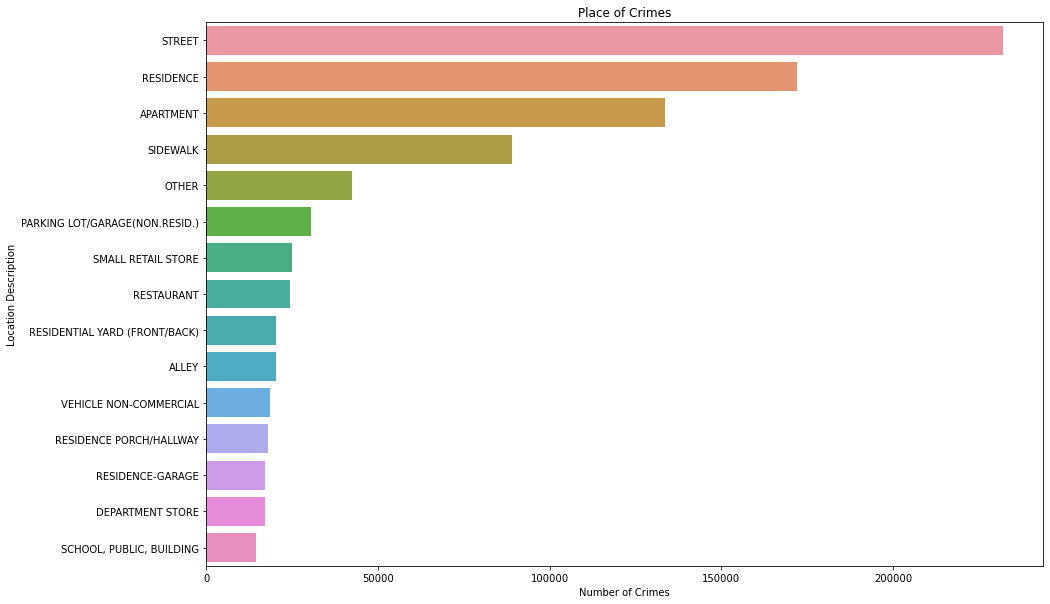

In [8]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = df, order = df['Location Description'].value_counts().iloc[:15].index)
plt.title('Place of Crimes')
plt.ylabel('Location Description')
plt.xlabel('Number of Crimes')

Convert dates to pandas datetime format

In [9]:
import datetime

df['Date']=pd.to_datetime(df['Date'])
df.index= pd.DatetimeIndex(df.Date)
df.index = pd.to_datetime(df.index)
df.Date

Date
2018-10-14 18:51:00   2018-10-14 18:51:00
2017-01-25 23:00:00   2017-01-25 23:00:00
2017-07-26 00:30:00   2017-07-26 00:30:00
2016-02-26 03:00:00   2016-02-26 03:00:00
2018-06-26 12:30:00   2018-06-26 12:30:00
                              ...        
2016-05-16 20:50:00   2016-05-16 20:50:00
2016-10-07 18:00:00   2016-10-07 18:00:00
2016-07-26 15:45:00   2016-07-26 15:45:00
2015-10-22 08:00:00   2015-10-22 08:00:00
2018-06-29 16:44:00   2018-06-29 16:44:00
Name: Date, Length: 1031744, dtype: datetime64[ns]

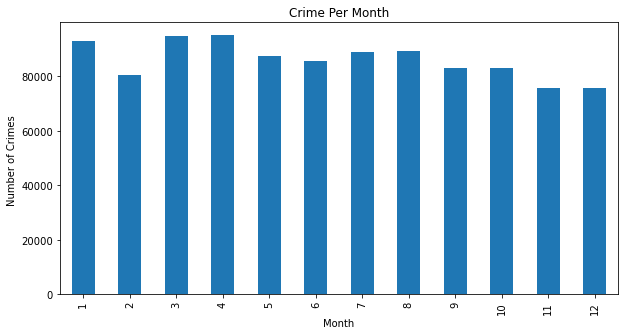

In [10]:
plt.figure(figsize = (10,5))
df.groupby([df.index.month]).size().plot.bar()
plt.title('Crime Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes ')
plt.show()

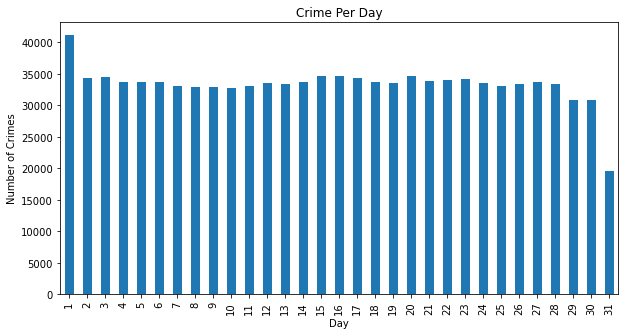

In [11]:
plt.figure(figsize = (10,5))
df.groupby([df.index.day]).size().plot.bar()
plt.title('Crime Per Day')
plt.xlabel('Day')
plt.ylabel('Number of Crimes')
plt.show()

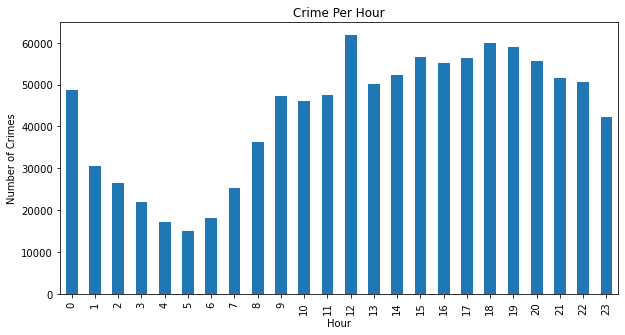

In [12]:
plt.figure(figsize = (10,5))
df.groupby([df.index.hour]).size().plot.bar()
plt.title('Crime Per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes')
plt.show()

Let's look at the correlation between each variables.

Text(0.5, 1.0, 'Correlation Matrix')

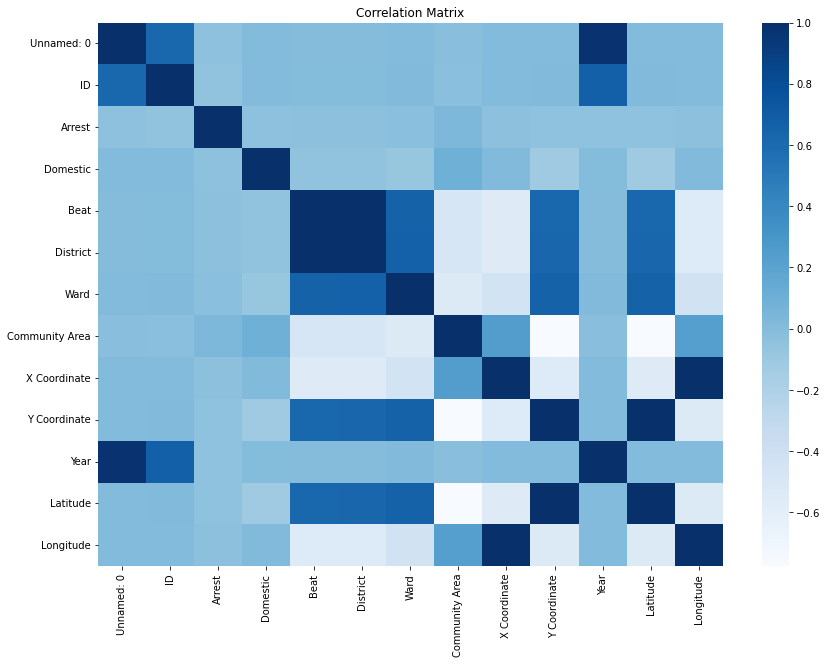

In [13]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap="Blues")
plt.title('Correlation Matrix')

Let's check if there is any null values.

In [14]:
df.isna().sum()

Unnamed: 0                  0
ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     3277
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                        9
Community Area              2
FBI Code                    0
X Coordinate            12635
Y Coordinate            12635
Year                        0
Updated On                  0
Latitude                12635
Longitude               12635
Location                12635
dtype: int64

## 3. Data Preparation (30 pts.)

Adding 'Month', 'Day', and 'Hour' Columns into the Dataset

In [15]:
df['Month']=(df['Date'].dt.month)
df['Day']=(df['Date'].dt.day)
df['Hour']=(df['Date'].dt.hour)
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-14 18:51:00,861410,11476552,JB475560,2018-10-14 18:51:00,039XX W OGDEN AVE,0820,THEFT,$500 AND UNDER,SMALL RETAIL STORE,True,...,1150286.0,1889027.0,2018,10/21/2018 04:09:44 PM,41.851393,-87.723904,"(41.851393305, -87.723903515)",10,14,18
2017-01-25 23:00:00,783641,10828749,JA130110,2017-01-25 23:00:00,011XX S OAKLEY BLVD,031A,ROBBERY,ARMED: HANDGUN,STREET,False,...,1161221.0,1894904.0,2017,02/14/2017 03:49:42 PM,41.867300,-87.683606,"(41.867300404, -87.683606131)",1,25,23
2017-07-26 00:30:00,650716,11031423,JA363907,2017-07-26 00:30:00,018XX N CLARK ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,...,1174558.0,1912475.0,2017,02/10/2018 03:50:01 PM,41.915229,-87.634119,"(41.915228778, -87.634118723)",7,26,0
2016-02-26 03:00:00,496462,10430338,HZ168230,2016-02-26 03:00:00,002XX W JACKSON BLVD,0860,THEFT,RETAIL THEFT,CONVENIENCE STORE,False,...,1174641.0,1898950.0,2016,02/10/2018 03:50:01 PM,41.878114,-87.634219,"(41.878113603, -87.634218691)",2,26,3
2018-06-26 12:30:00,946330,11361027,JB324433,2018-06-26 12:30:00,0000X E MONROE ST,0890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,...,1176686.0,1899939.0,2018,07/03/2018 03:55:36 PM,41.880782,-87.626680,"(41.880781519, -87.626680112)",6,26,12


Let's make a brand new table consisting of "Primary Type","District", "Date", "Month", "Day", and "Hour".

In [16]:
df_crimes = df[["Primary Type","District", "Date", "Month", "Day", "Hour"]].copy()
df_crimes

,Primary Type,District,Date,Month,Day,Hour
Date,,,,,,
2018-10-14 18:51:00,THEFT,10.0,2018-10-14 18:51:00,10,14,18
2017-01-25 23:00:00,ROBBERY,12.0,2017-01-25 23:00:00,1,25,23
2017-07-26 00:30:00,MOTOR VEHICLE THEFT,18.0,2017-07-26 00:30:00,7,26,0
2016-02-26 03:00:00,THEFT,1.0,2016-02-26 03:00:00,2,26,3
2018-06-26 12:30:00,THEFT,1.0,2018-06-26 12:30:00,6,26,12
...,...,...,...,...,...,...
2016-05-16 20:50:00,THEFT,2.0,2016-05-16 20:50:00,5,16,20
2016-10-07 18:00:00,THEFT,25.0,2016-10-07 18:00:00,10,7,18
2016-07-26 15:45:00,THEFT,1.0,2016-07-26 15:45:00,7,26,15


Let's simpilify the table above

In [17]:
crimes = pd.pivot_table(df_crimes[["District", "Month", "Day", "Hour", "Date"]], index=df_crimes[["District", "Month", "Day", "Hour"]], aggfunc="count")
crimes.reset_index(inplace=True)
crimes.rename(columns={"Date":"CrimeCounts"}, inplace=True)
crimes.head(10)

,District,Month,Day,Hour,CrimeCounts
0,1.0,1,1,0,24
1,1.0,1,1,1,12
2,1.0,1,1,2,11
3,1.0,1,1,3,9
4,1.0,1,1,4,5
5,1.0,1,1,5,4
6,1.0,1,1,6,2
7,1.0,1,1,7,1
8,1.0,1,1,8,8
9,1.0,1,1,9,9


Let's set the Crime Rate
Level of Crime Rate:
<ul><li><strong>0-14 : </strong>Low Crime Rate = 0</li>
<li><strong>15-33 : </strong>Medium Crime Rate = 1</li>
<li><strong>34 and above : </strong>High Crime Rate = 2</li>
<br>

In [18]:
crimes.loc[crimes['CrimeCounts'] <= 14, 'CrimeCounts'] = 0
crimes.loc[(crimes['CrimeCounts'] >= 15) & (crimes['CrimeCounts'] <=33), 'CrimeCounts'] = 1
crimes.loc[crimes['CrimeCounts'] > 33, 'CrimeCounts'] = 2
    
crimes

,District,Month,Day,Hour,CrimeCounts
0,1.0,1,1,0,1
1,1.0,1,1,1,0
2,1.0,1,1,2,0
3,1.0,1,1,3,0
4,1.0,1,1,4,0
...,...,...,...,...,...
185310,31.0,9,1,14,0
185311,31.0,9,4,10,0
185312,31.0,9,16,10,0
185313,31.0,9,23,12,0


In [19]:
crimes.groupby(by=["CrimeCounts"]).count()

,District,Month,Day,Hour
CrimeCounts,,,,
0,182254,182254,182254,182254
1,3039,3039,3039,3039
2,22,22,22,22


C:\Users\DEVIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


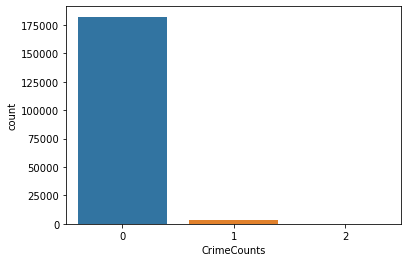

In [20]:
g = sns.countplot(crimes['CrimeCounts'])
g.set_xticklabels(['0','1','2'])
plt.show()

As we can see here, there is an imbalance in the CrimeCounts category. We will use Oversampling technique to overcome that.

First, we are going to seperate all the CrimeCounts values into 3.

In [21]:
CrimeCounts_0, CrimeCounts_1, CrimeCounts_2 = crimes['CrimeCounts'].value_counts()

Crime_0 = crimes[crimes['CrimeCounts'] == 0]
Crime_1 = crimes[crimes['CrimeCounts'] == 1]
Crime_2 = crimes[crimes['CrimeCounts'] == 2]
# print the shape of the class
print('Crime 0:', Crime_0.shape)
print('Crime 1:', Crime_1.shape)
print('Crime 2:', Crime_2.shape)

Crime 0: (182254, 5)
Crime 1: (3039, 5)
Crime 2: (22, 5)


total CrimeCounts of 1 and 0: 0    182254
1    182254
2    182254
Name: CrimeCounts, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

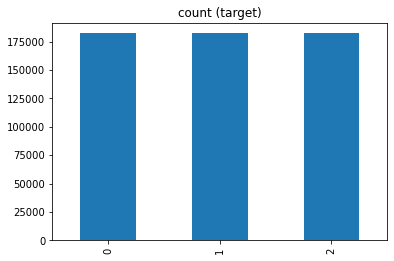

In [29]:
Crime_1_over = Crime_1.sample(CrimeCounts_0, replace=True)
Crime_2_over = Crime_2.sample(CrimeCounts_0, replace=True)

test_over = pd.concat([Crime_0,Crime_1_over,Crime_2_over], axis=0)

print("total CrimeCounts of 1 and 0:",test_over['CrimeCounts'].value_counts())# plot the count after under-sampeling
test_over['CrimeCounts'].value_counts().plot(kind='bar', title='count (target)')

Creating our test set. Our original one and after oversampling.

In [23]:
from sklearn.model_selection import train_test_split
#original
x=crimes.iloc[:,0:-1]

y=crimes["CrimeCounts"]
y=pd.DataFrame(y,columns=["CrimeCounts"])

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
print("X_train shape: ",x_train.shape)
print("X_test shape: ",x_test.shape)
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (129720, 4)
X_test shape:  (55595, 4)
Y_train shape:  (129720, 1)
Y_test shape:  (55595, 1)


In [24]:
#After Over-Sampling
x_over=test_over.iloc[:,0:-1]

y_over=test_over["CrimeCounts"]
y_over=pd.DataFrame(y_over,columns=["CrimeCounts"])

x_over_train, x_over_test, y_over_train, y_over_test = train_test_split(x_over,y_over, test_size = 0.3, random_state = 42)
print("X_train shape: ",x_over_train.shape)
print("X_test shape: ",x_over_test.shape)
print("Y_train shape: ",y_over_train.shape)
print("Y_test shape: ",y_over_test.shape)

X_train shape:  (382733, 4)
X_test shape:  (164029, 4)
Y_train shape:  (382733, 1)
Y_test shape:  (164029, 1)


## 4. Build and Assess the machine learning models (35 pts.)

**You have to evaluate the machine learning models using at least two performance metrics (for example: precision and recall)**. 

In [25]:
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

def evaluate(model):
    #original
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test) 
    #oversampling
    model.fit(x_over_train,y_over_train)
    y_over_pred=model.predict(x_over_test) 
    
    #printing the model name and accuracy !!!!!
    print("Original!")
    print("Model name:---->>>",model)
    print("accuracy score:--->>",accuracy_score(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("<<<<-------------------------------------------------------------------->>>>")
    print("After Over-Sampling!")
    print("Model name:---->>>",model)
    print("accuracy score:--->>",accuracy_score(y_over_test,y_over_pred))
    print("\n")
    print(classification_report(y_over_test,y_over_pred))
    print("<<<<-------------------------------------------------------------------->>>>")

### First Model : Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=42)

models=[rf] #create a list of models 

for model in models:
    evaluate(model)

Original!
Model name:---->>> RandomForestClassifier(random_state=42)
accuracy score:--->> 0.9829481068441407


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     54701
           1       0.39      0.12      0.18       888
           2       0.80      0.67      0.73         6

    accuracy                           0.98     55595
   macro avg       0.73      0.59      0.63     55595
weighted avg       0.98      0.98      0.98     55595

<<<<-------------------------------------------------------------------->>>>
After Over-Sampling!
Model name:---->>> RandomForestClassifier(random_state=42)
accuracy score:--->> 0.9954276377957556


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     54610
           1       0.99      1.00      0.99     54789
           2       1.00      1.00      1.00     54630

    accuracy                           1.00    164029
   macro avg       1.00      1.00    

### Second Model : Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

models=[dtc] #create a list of models 

for model in models:
    evaluate(model)

Original!
Model name:---->>> DecisionTreeClassifier()
accuracy score:--->> 0.9700872380609767


              precision    recall  f1-score   support

           0       0.99      0.98      0.98     54701
           1       0.15      0.19      0.17       888
           2       0.67      0.67      0.67         6

    accuracy                           0.97     55595
   macro avg       0.60      0.61      0.61     55595
weighted avg       0.97      0.97      0.97     55595

<<<<-------------------------------------------------------------------->>>>
After Over-Sampling!
Model name:---->>> DecisionTreeClassifier()
accuracy score:--->> 0.9933243511818032


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     54610
           1       0.98      1.00      0.99     54789
           2       1.00      1.00      1.00     54630

    accuracy                           0.99    164029
   macro avg       0.99      0.99      0.99    164029
weighted avg 

## 5. Choose your Final Model (3 pts.)

**You finally have your final model. Write comments to justify your final model**

For our final model, we will choose the first model which is using the Random Forest Classifier. We chose this model because the score from before and after Over-Sampling is higher/better than the second model. 

In [28]:
rf=RandomForestClassifier(random_state=42)

models=[rf] #create a list of models 

for model in models:
    evaluate(model)

Original!
Model name:---->>> RandomForestClassifier(random_state=42)
accuracy score:--->> 0.9829481068441407


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     54701
           1       0.39      0.12      0.18       888
           2       0.80      0.67      0.73         6

    accuracy                           0.98     55595
   macro avg       0.73      0.59      0.63     55595
weighted avg       0.98      0.98      0.98     55595

<<<<-------------------------------------------------------------------->>>>
After Over-Sampling!
Model name:---->>> RandomForestClassifier(random_state=42)
accuracy score:--->> 0.9954276377957556


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     54610
           1       0.99      1.00      0.99     54789
           2       1.00      1.00      1.00     54630

    accuracy                           1.00    164029
   macro avg       1.00      1.00    